In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import prepare
import wrangle_zillow

print("Success")

Success


In [2]:
train, validate, test = wrangle_zillow.prep_zillow()
print(f" Number of rows train, validate, test {train.shape[0], validate.shape[0], test.shape[0]}")
print(train.isnull().sum().sort_values(ascending=False))

 Number of rows train, validate, test (20240, 6747, 6747)
propertylandusedesc             0
heatingorsystemdesc             0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
transactiondate                 0
logerror                        0
bathroomcnt                     0
dtype: int64


- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- Answer those questions through a mix of statistical tests and visualizations.
- In your exploration, be sure you include the following:
    - a plot with at least 3 dimensions, such as x, y, and color.
    - at least 3 different types of plots (like box, scatter, bar, ...)
    - at least 2 statistical tests.
- document takeaways/conclusions after each question is addressed.



In [3]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'transactiondate', 'logerror', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

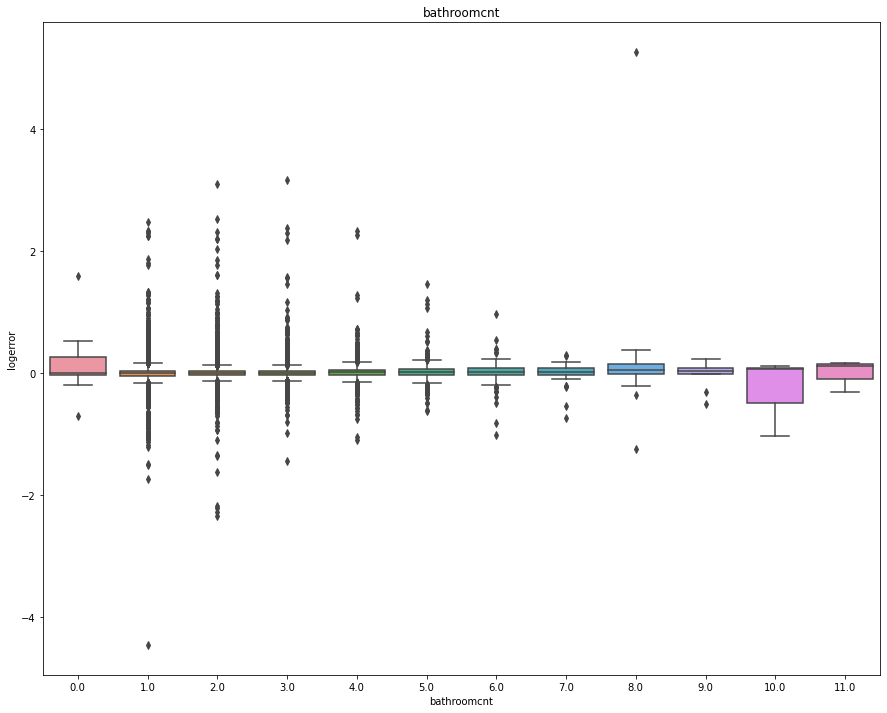

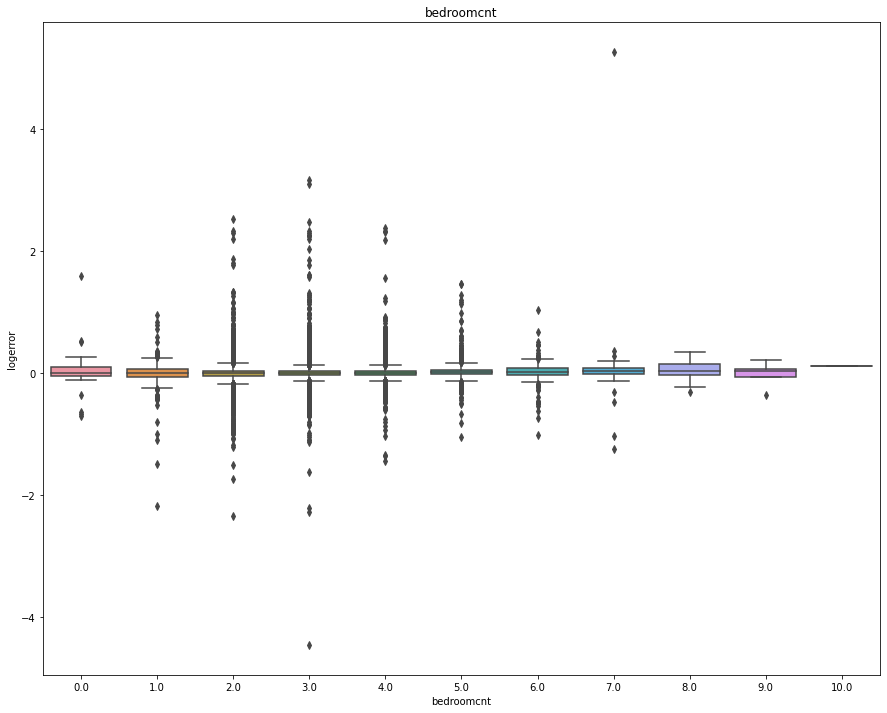

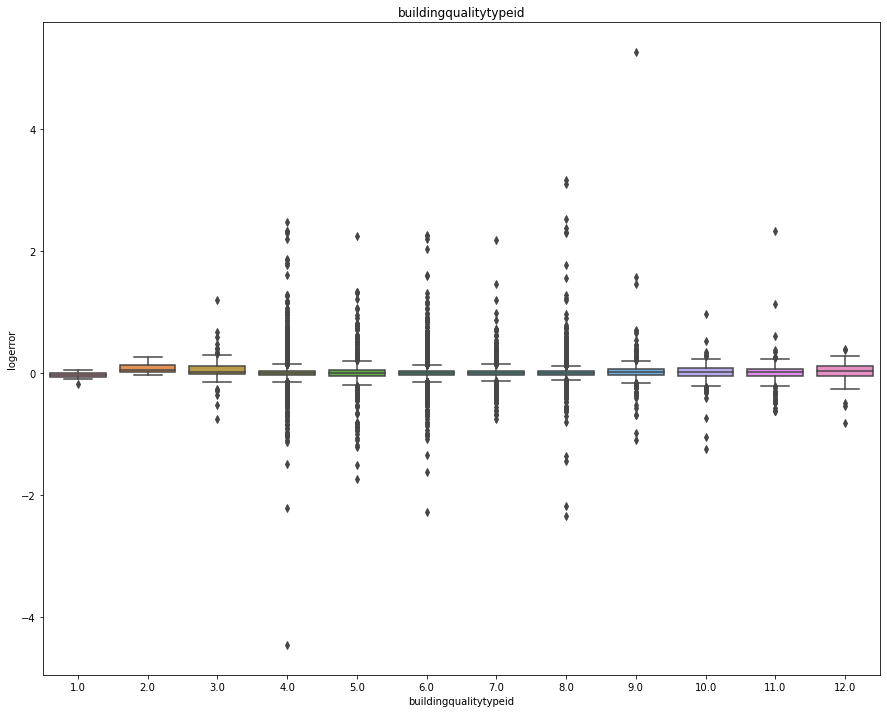

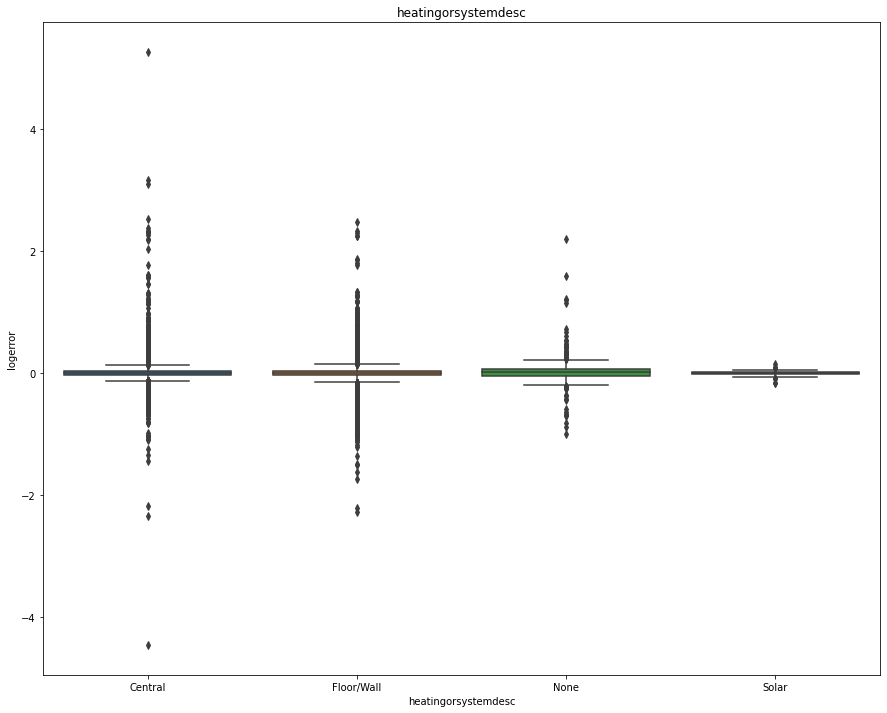

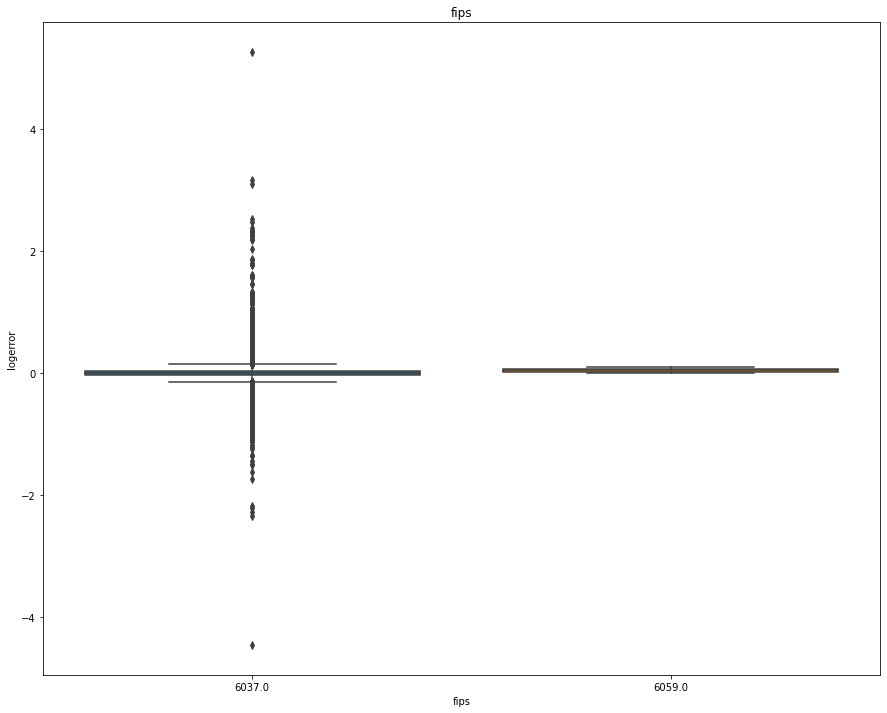

In [4]:
columns = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'heatingorsystemdesc', 'fips']

# loop through the columns and create a scatter plot for each feature and target pair
for col in columns:
    plt.figure(figsize=(15,12))
    sns.boxplot(data=train, x=col, y='logerror')
    plt.title(col)

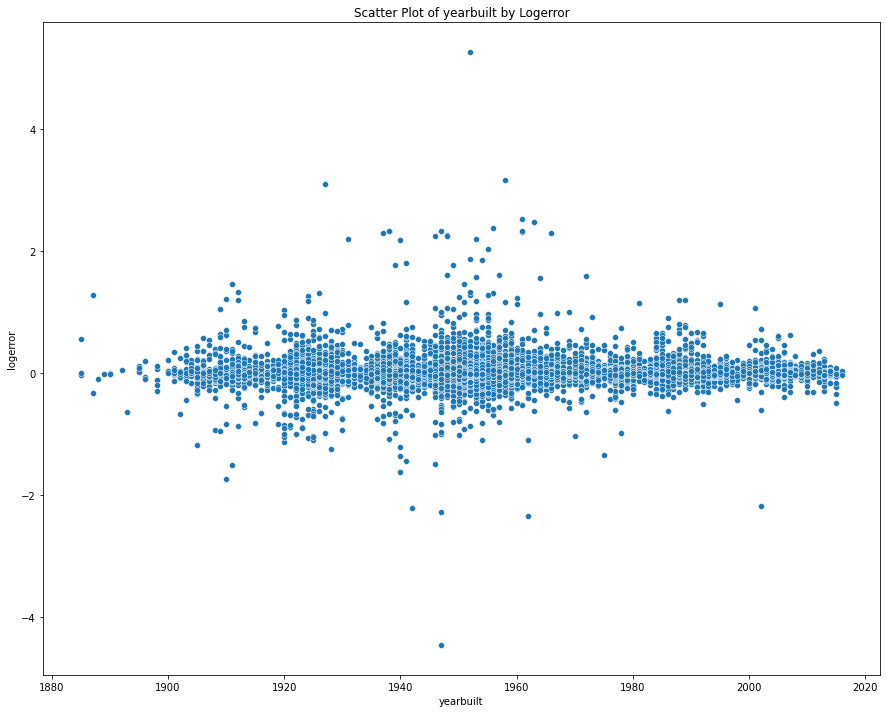

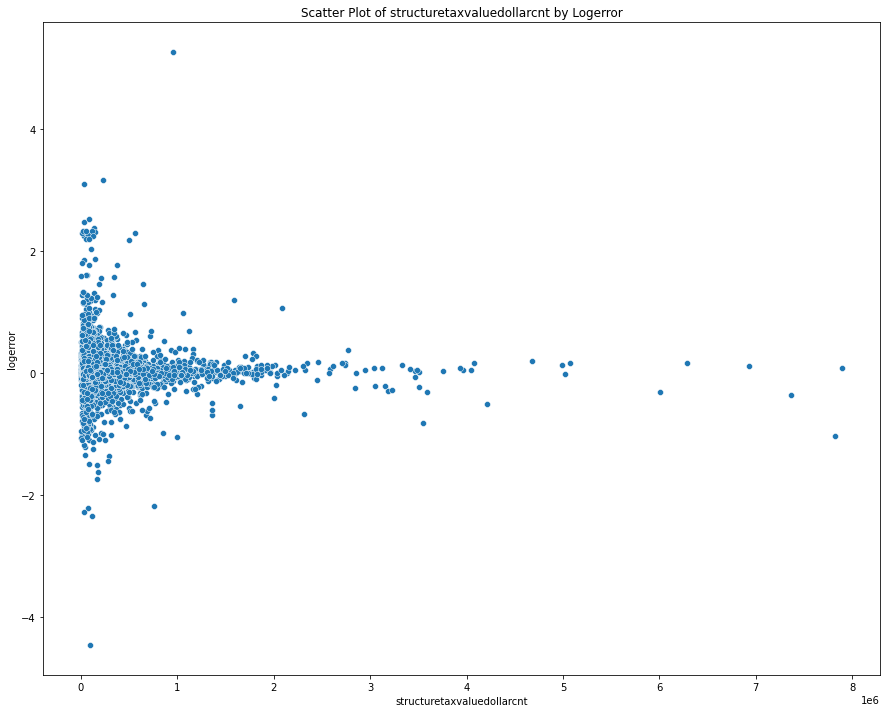

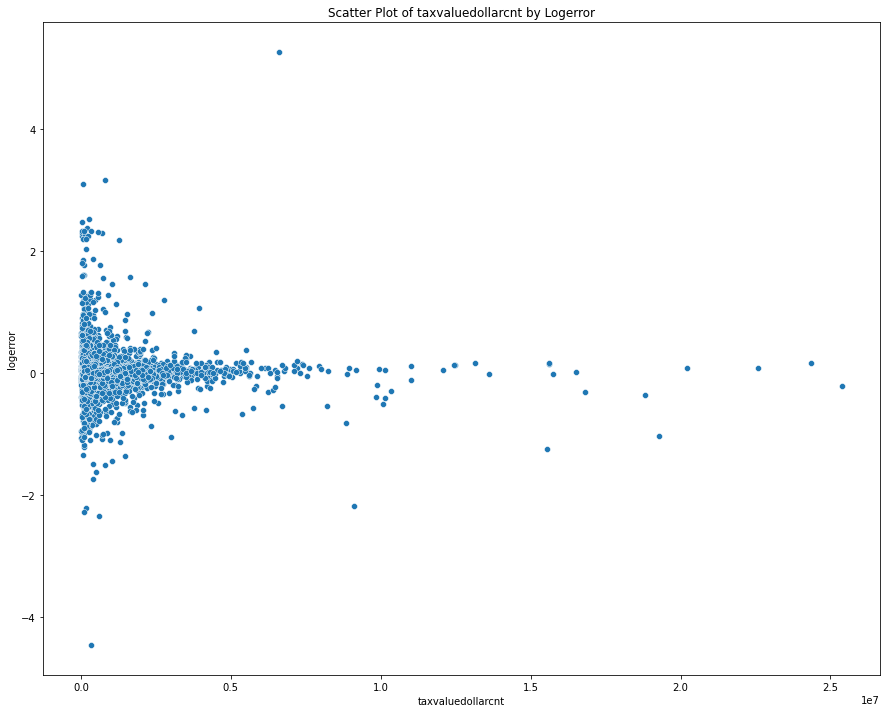

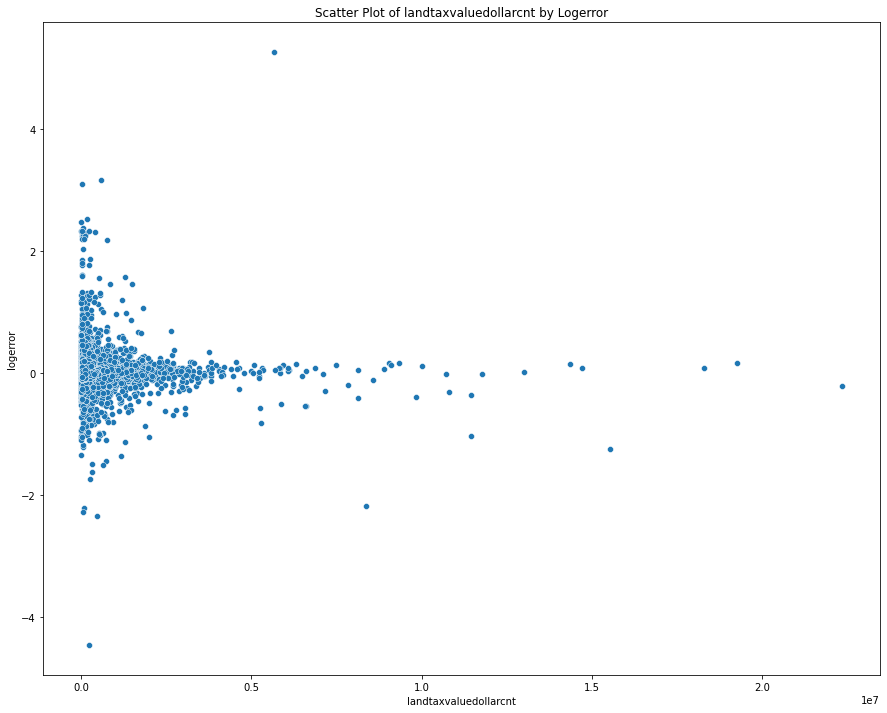

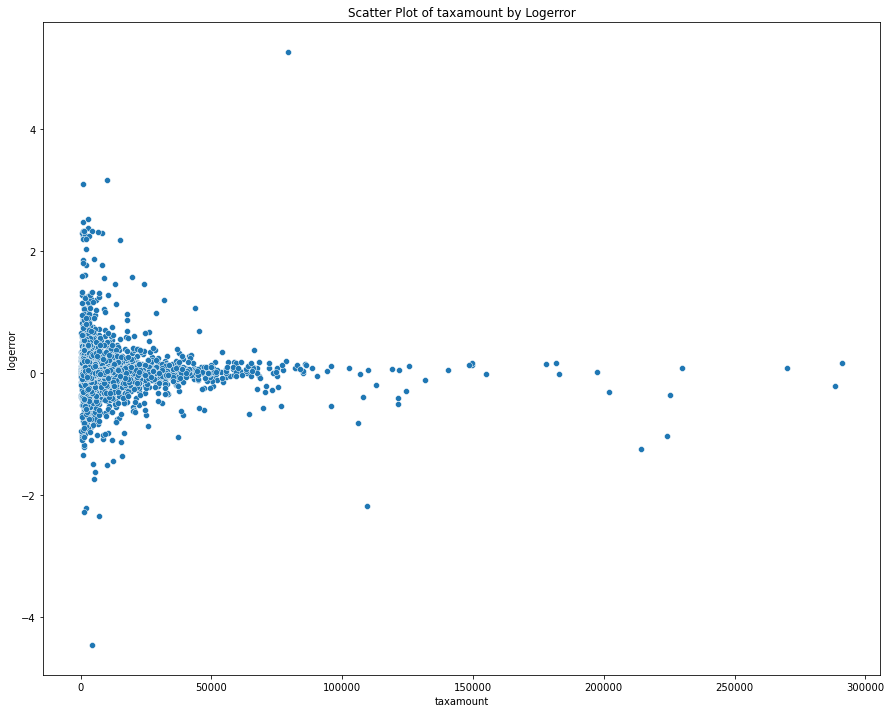

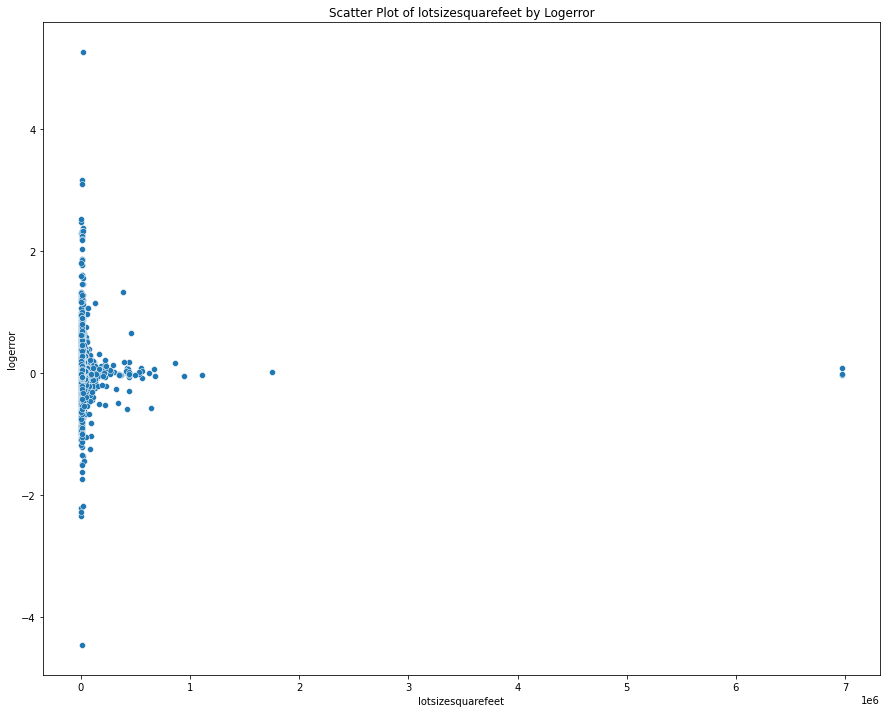

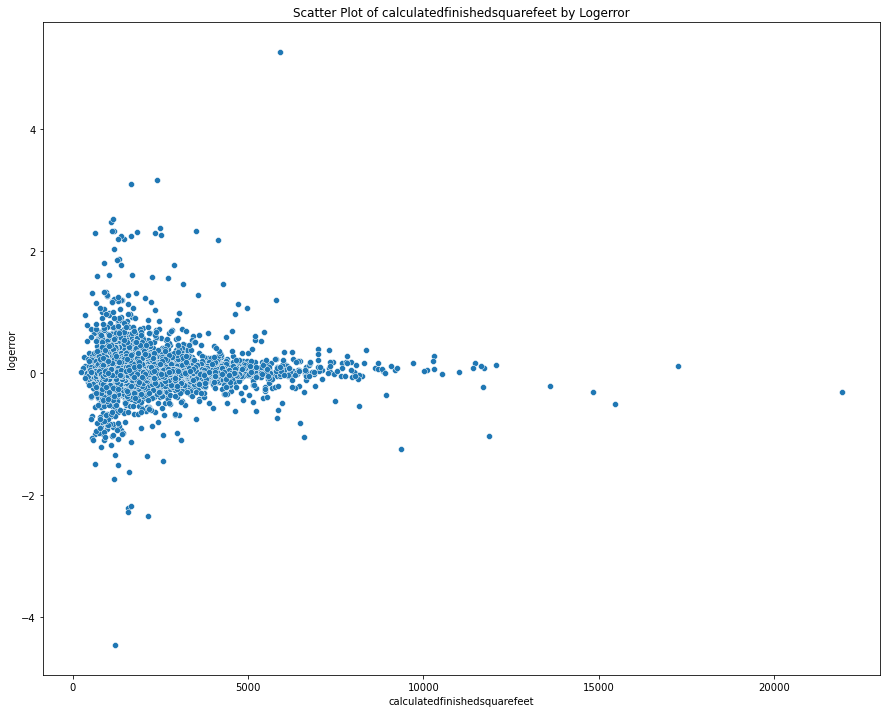

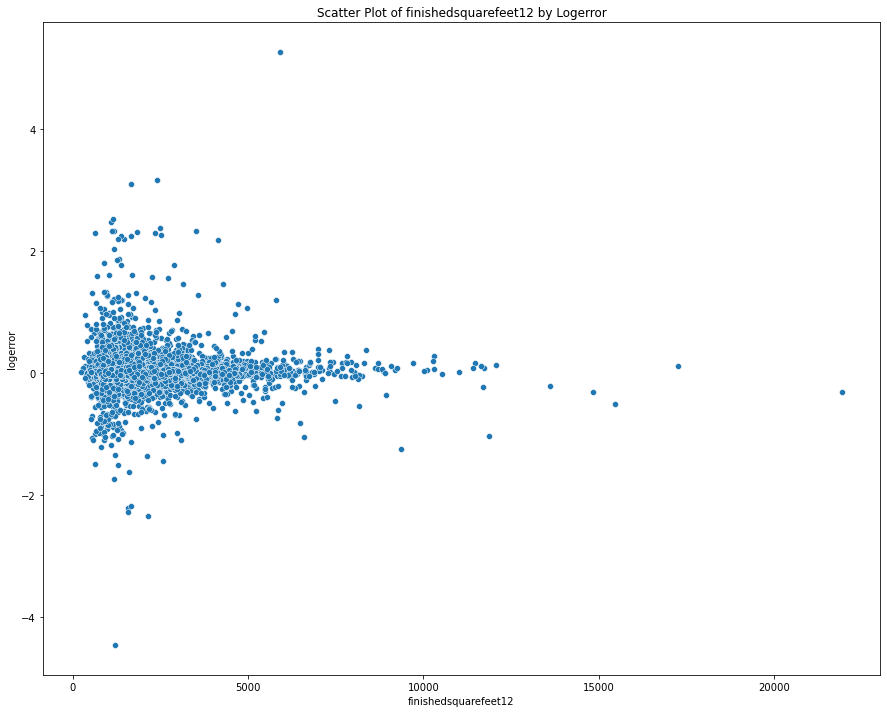

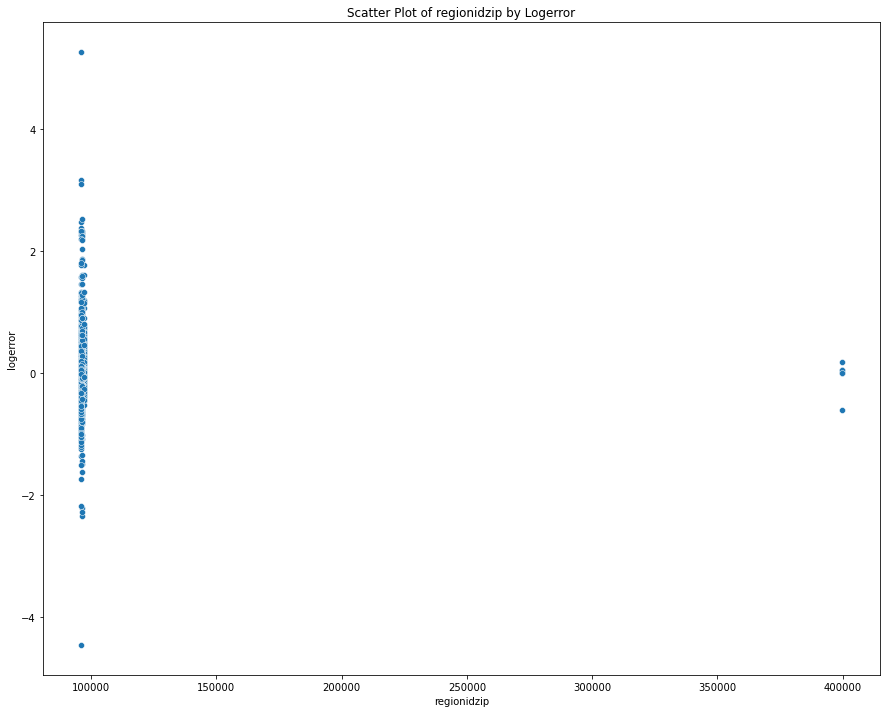

In [5]:
columns = ['yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',  'landtaxvaluedollarcnt', 
           'taxamount', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'regionidzip']

for col in columns:
    plt.figure(figsize=(15,12))
    sns.scatterplot(data=train, x=col, y='logerror')
    plt.title(f"Scatter Plot of {col} by Logerror")

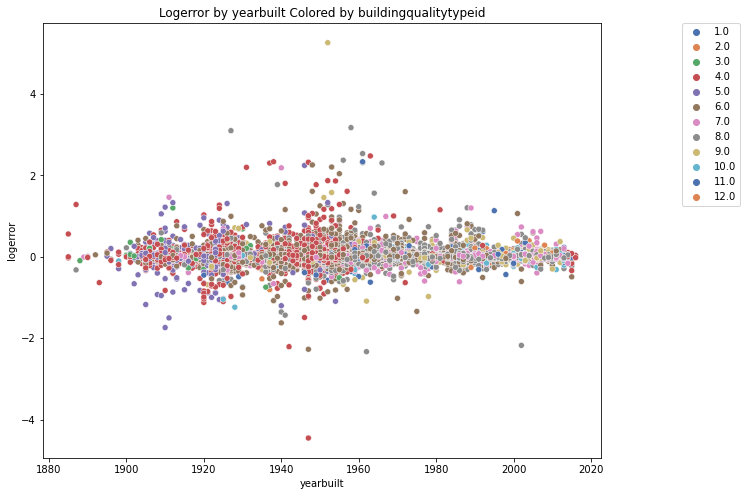

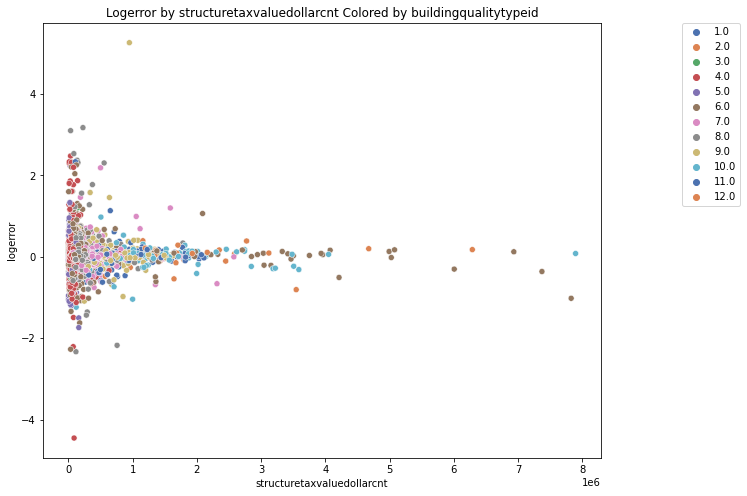

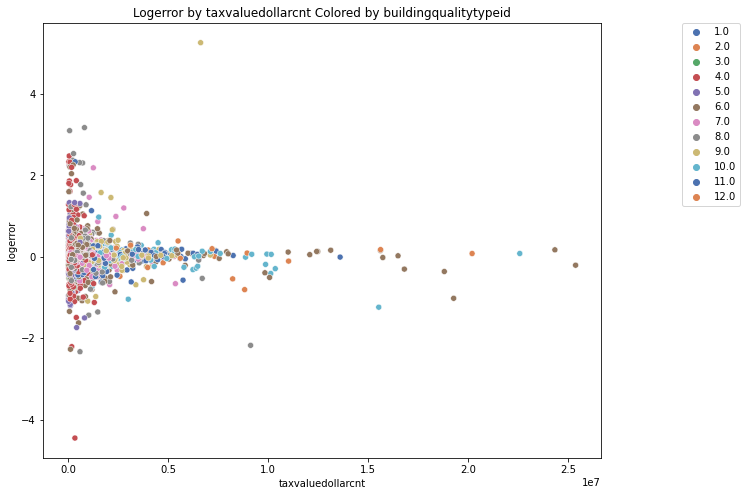

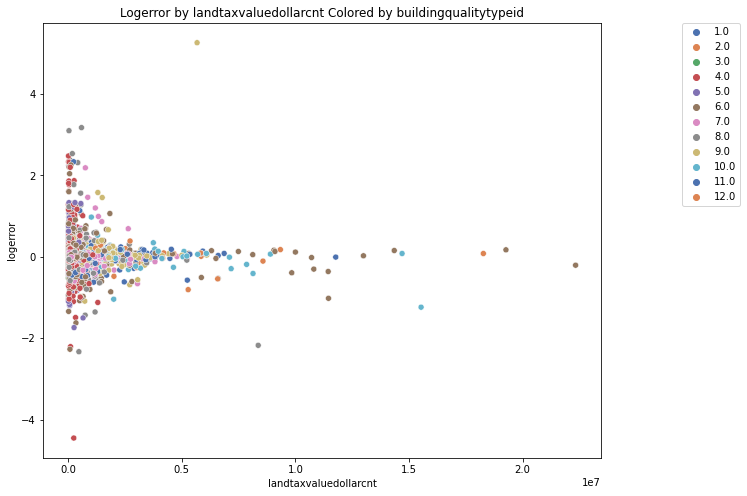

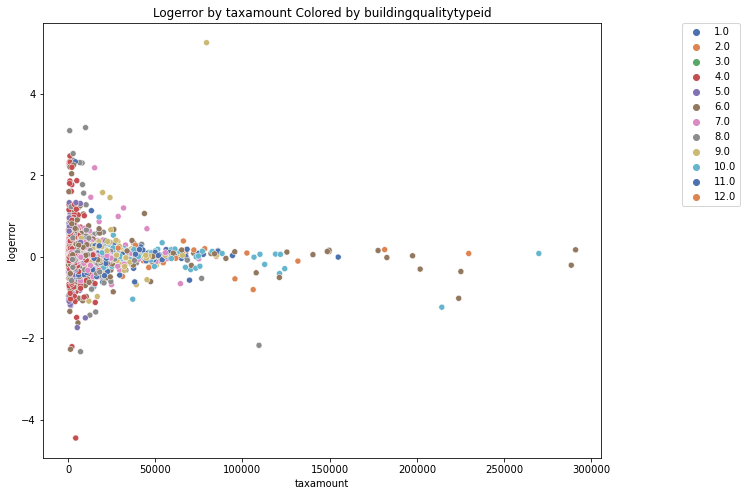

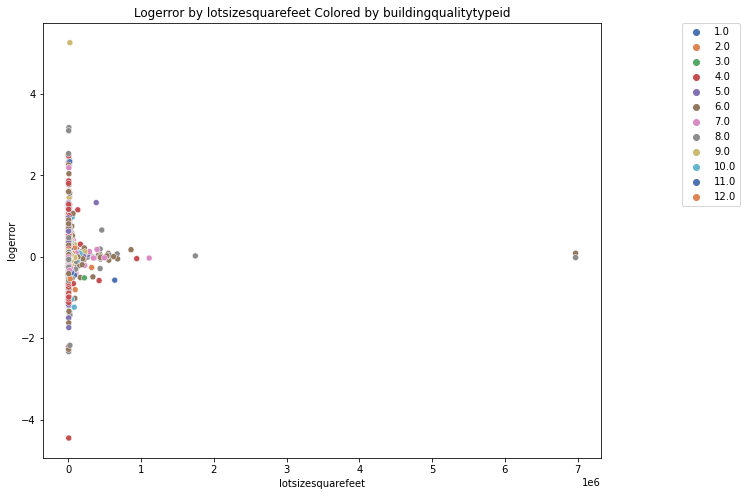

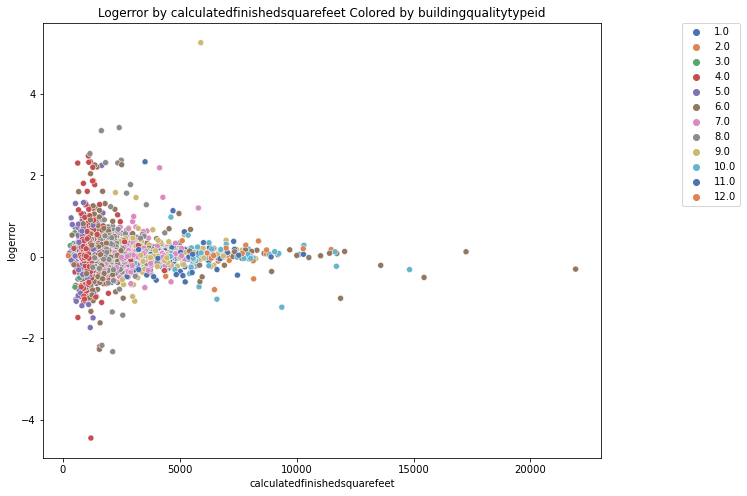

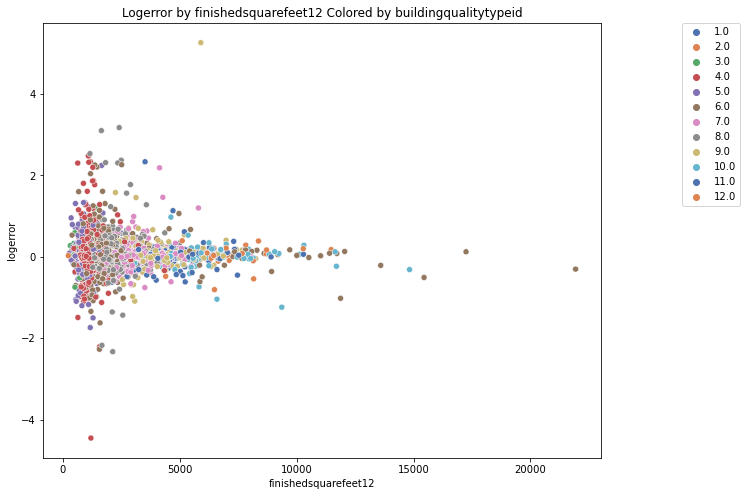

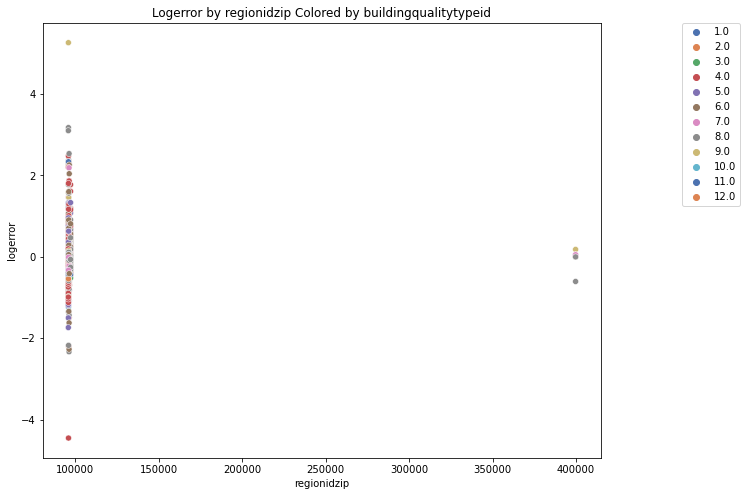

In [6]:
columns = ['yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',  'landtaxvaluedollarcnt', 
           'taxamount', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'regionidzip']

for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='buildingqualitytypeid', palette='deep')
    plt.title(f"Logerror by {col} Colored by buildingqualitytypeid")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)


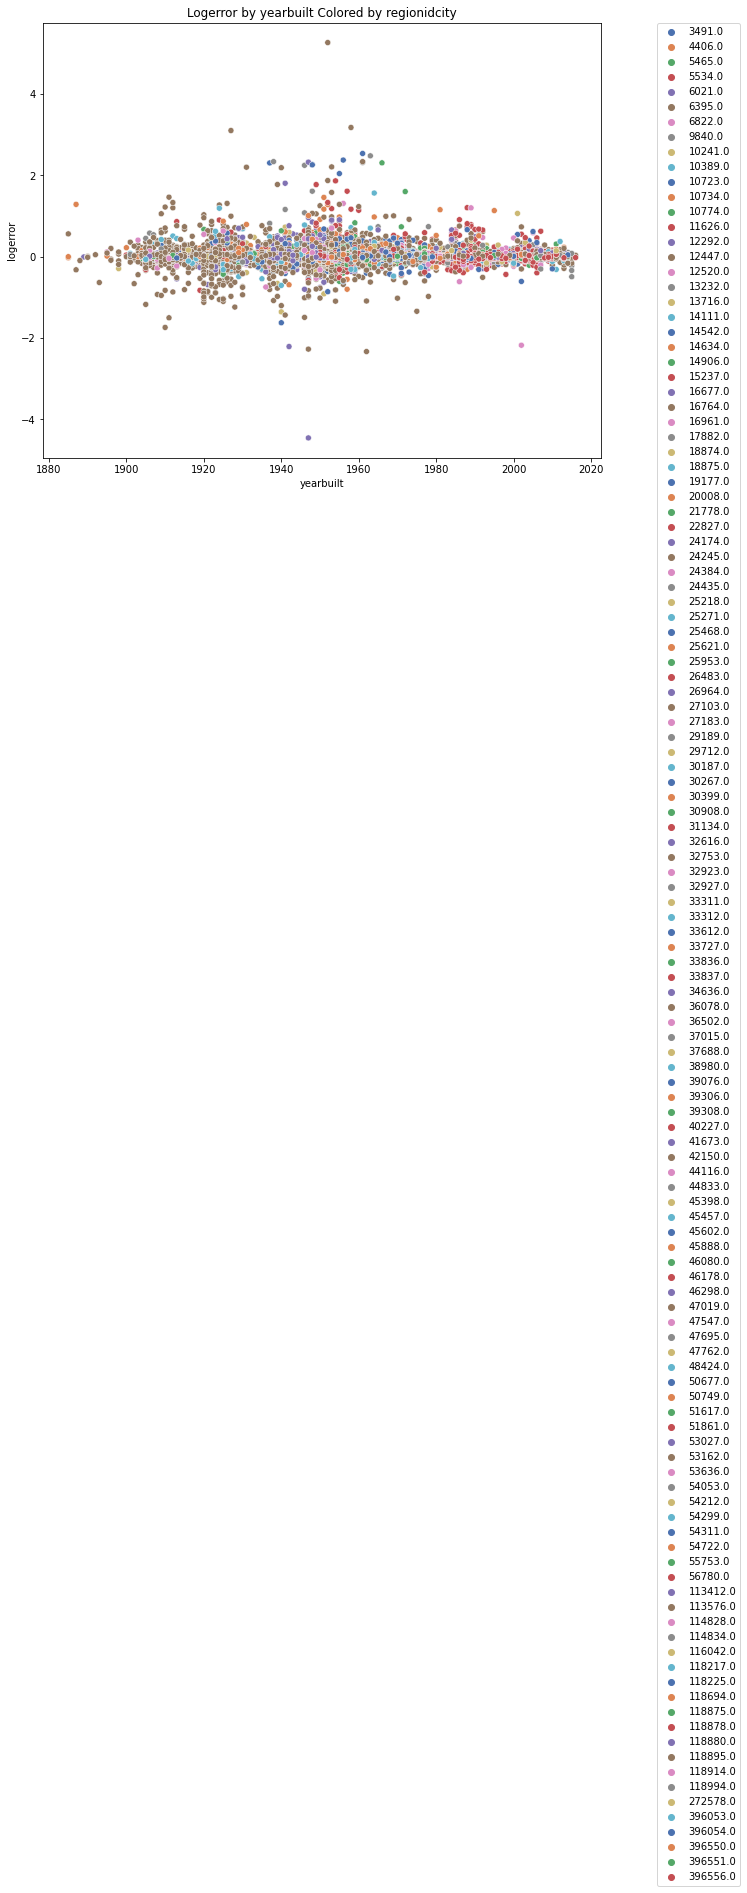

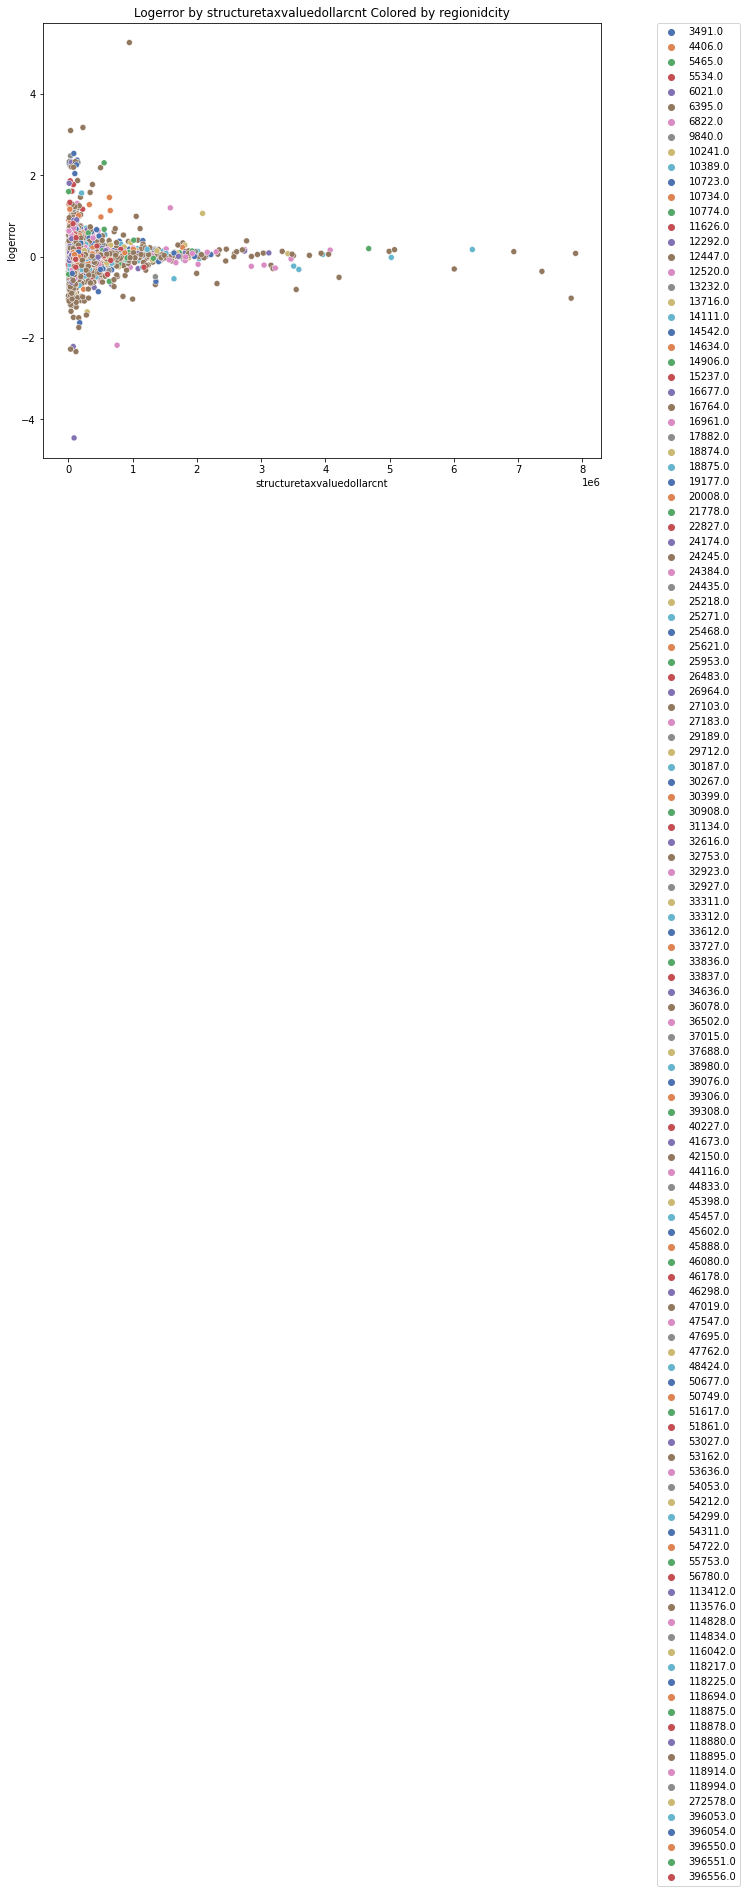

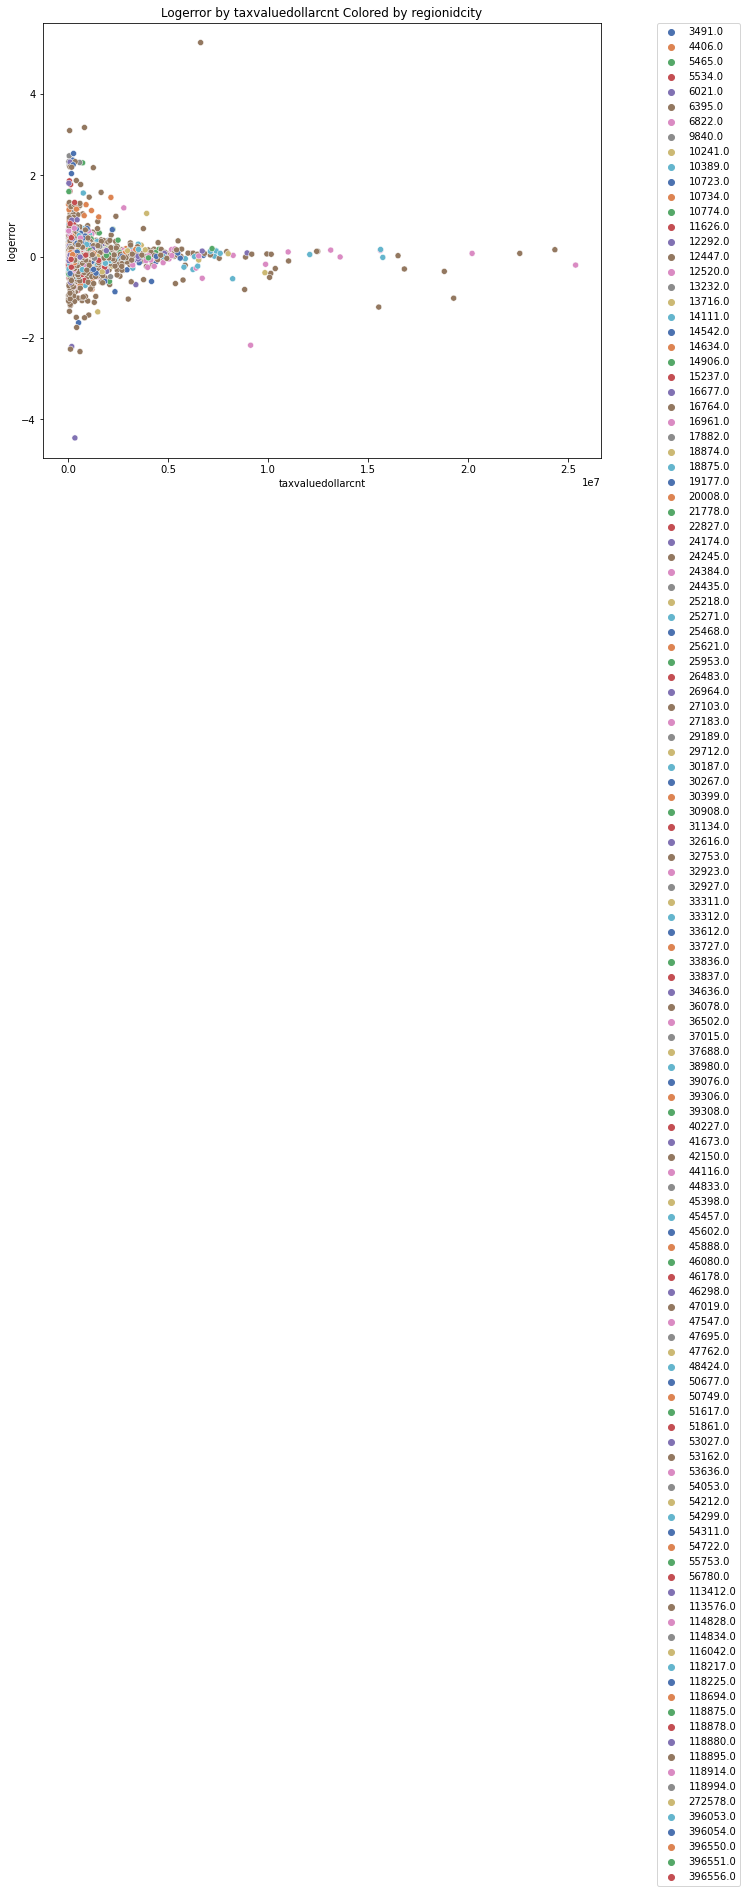

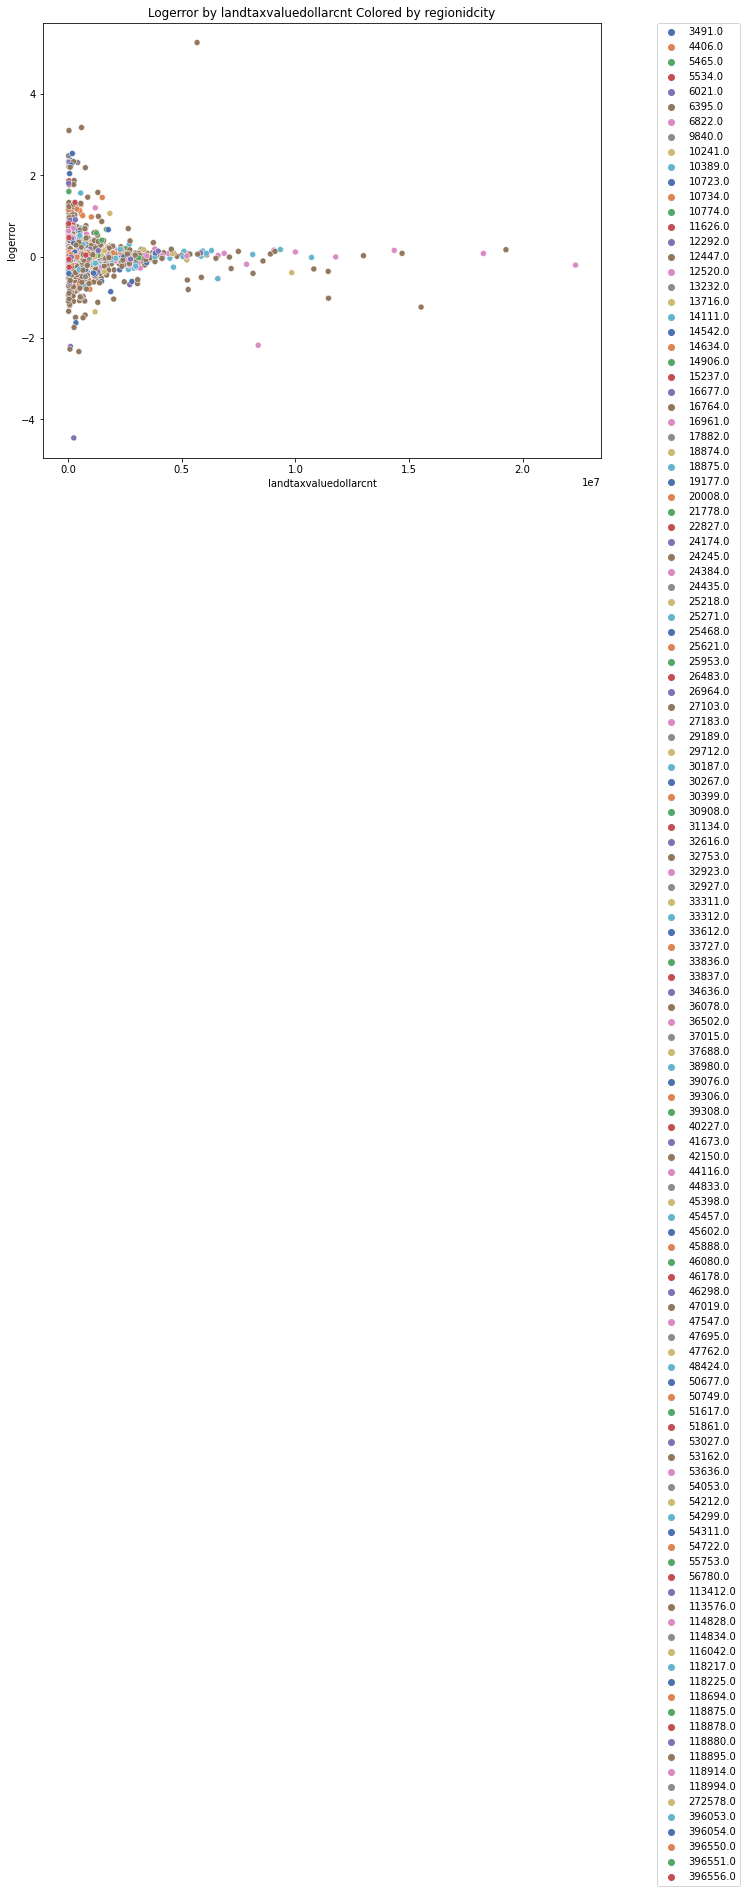

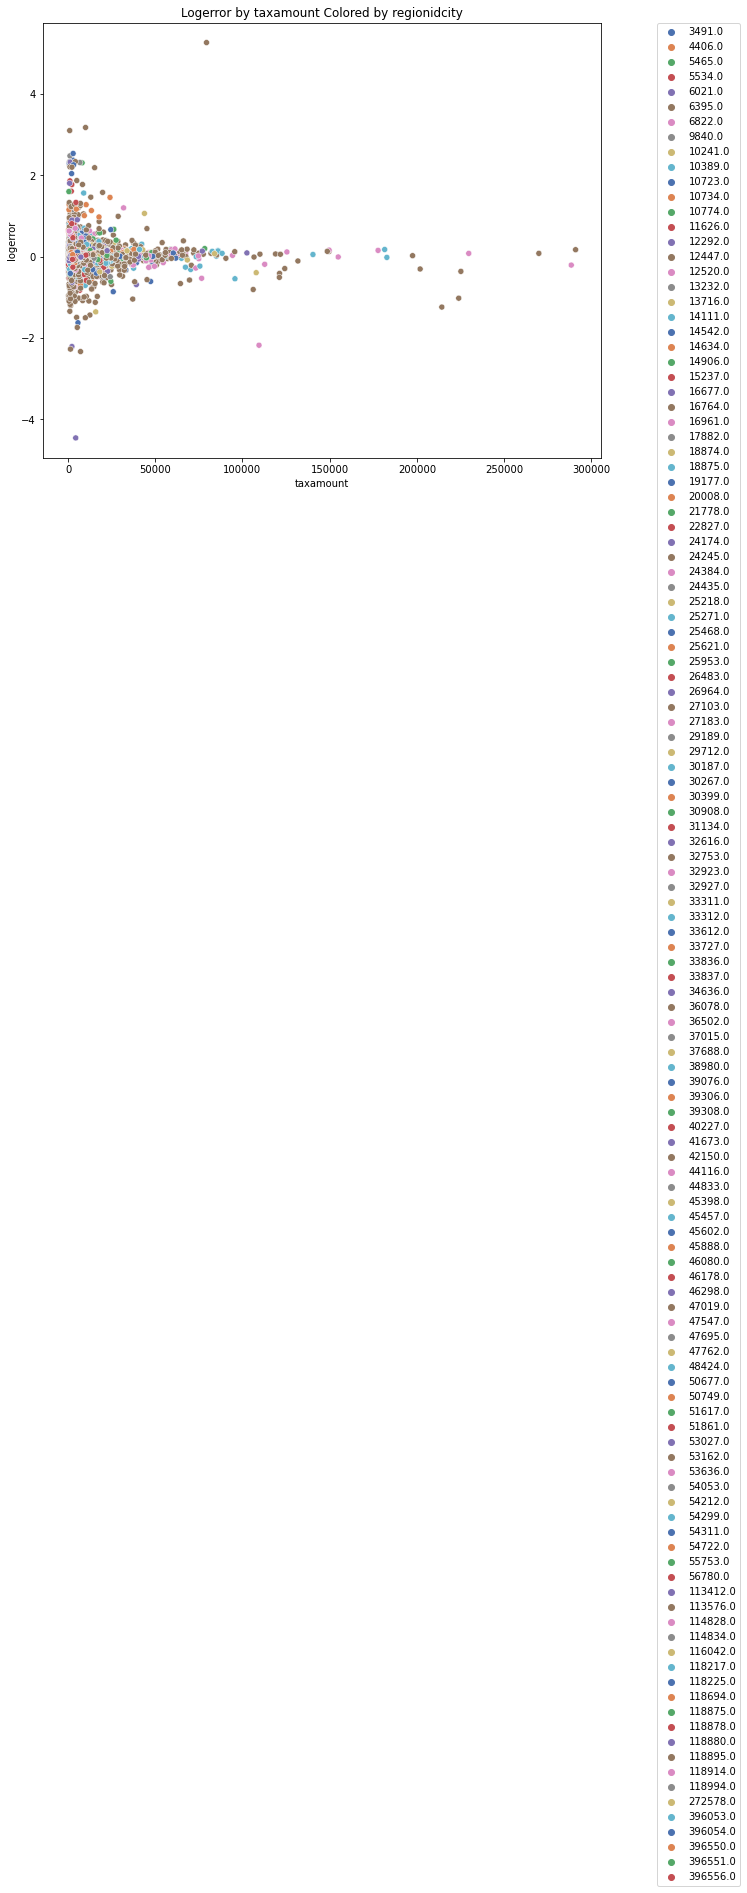

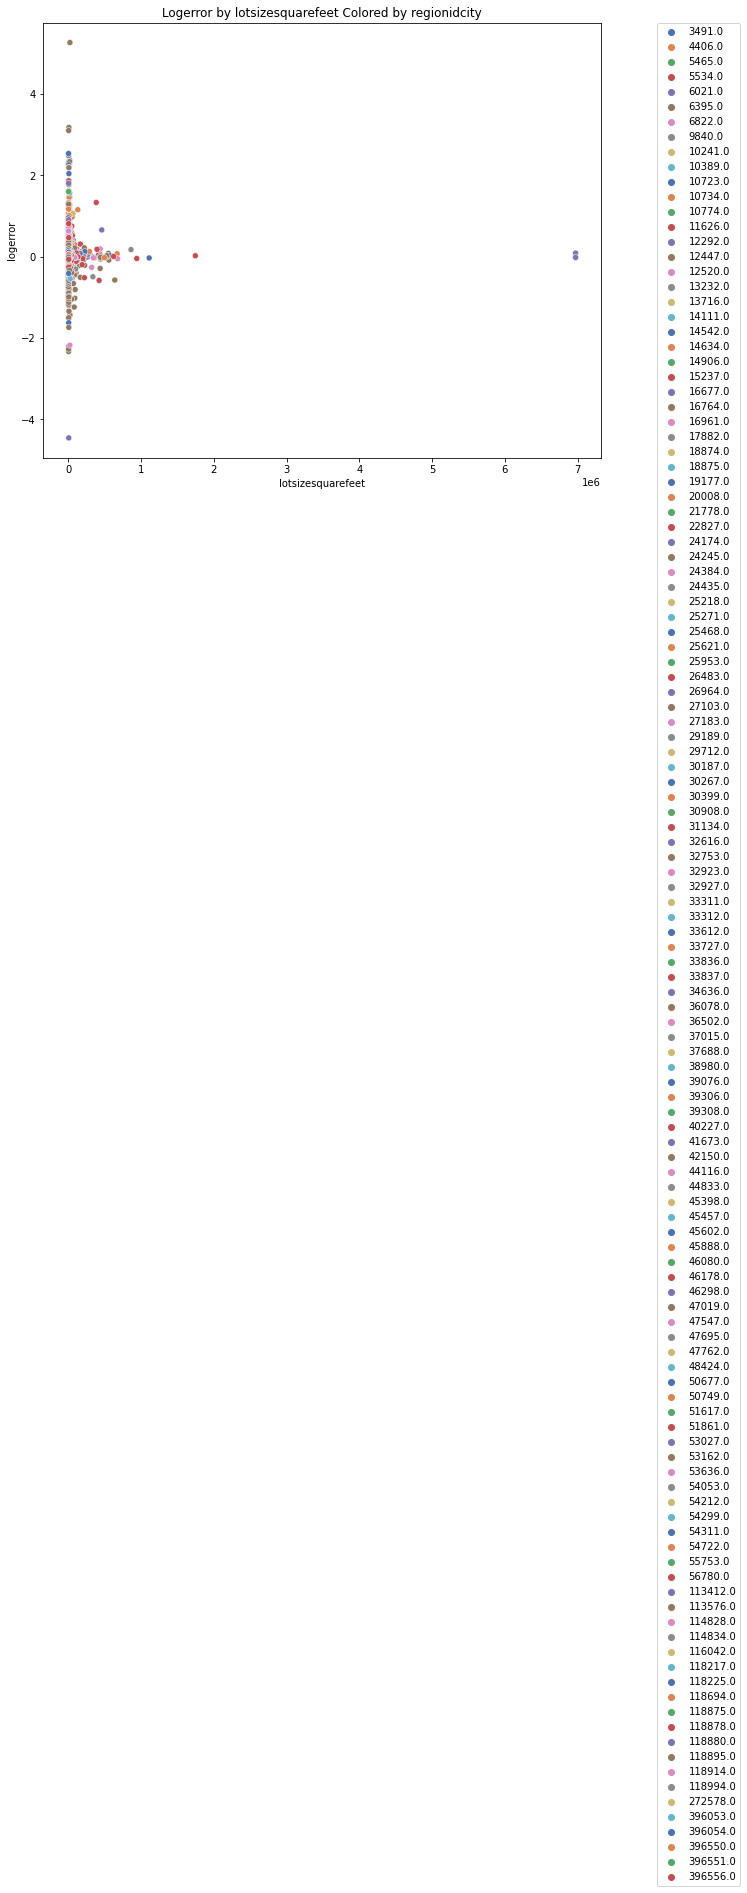

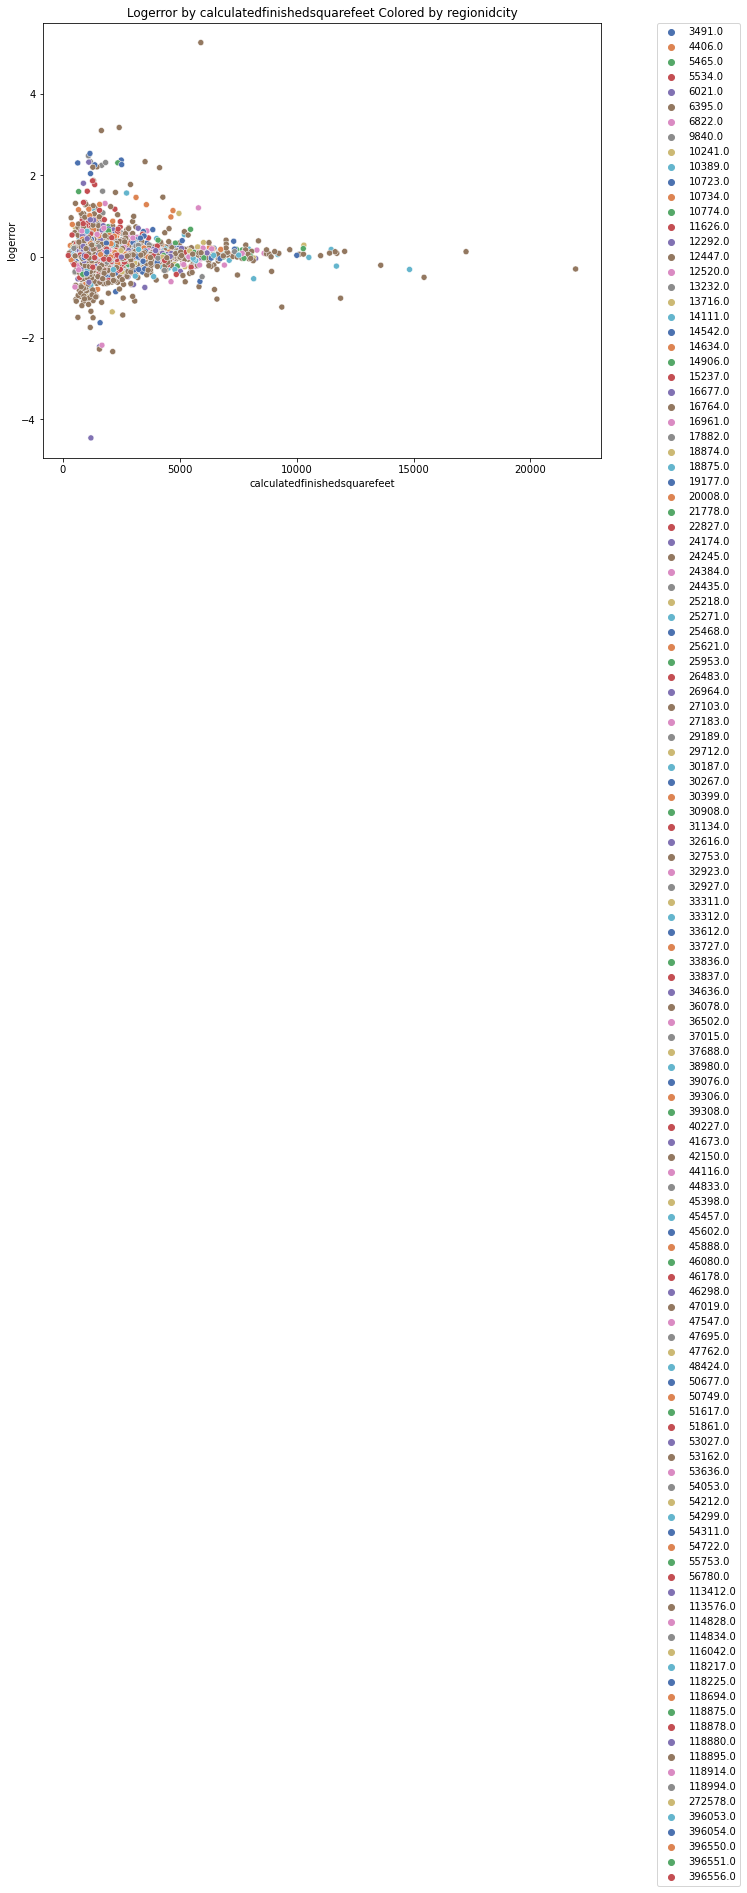

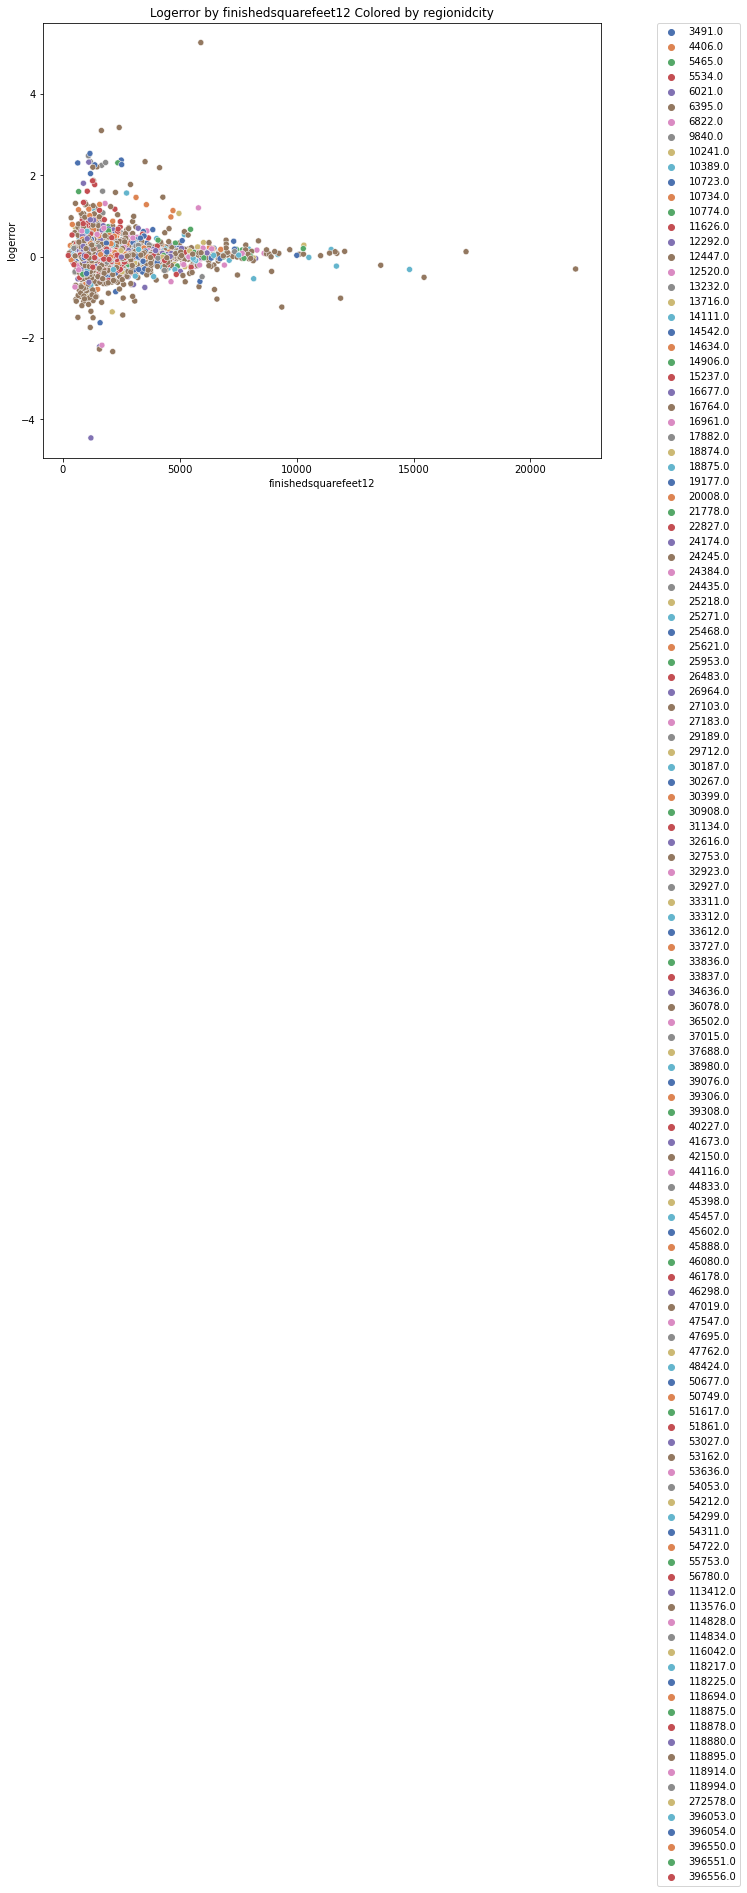

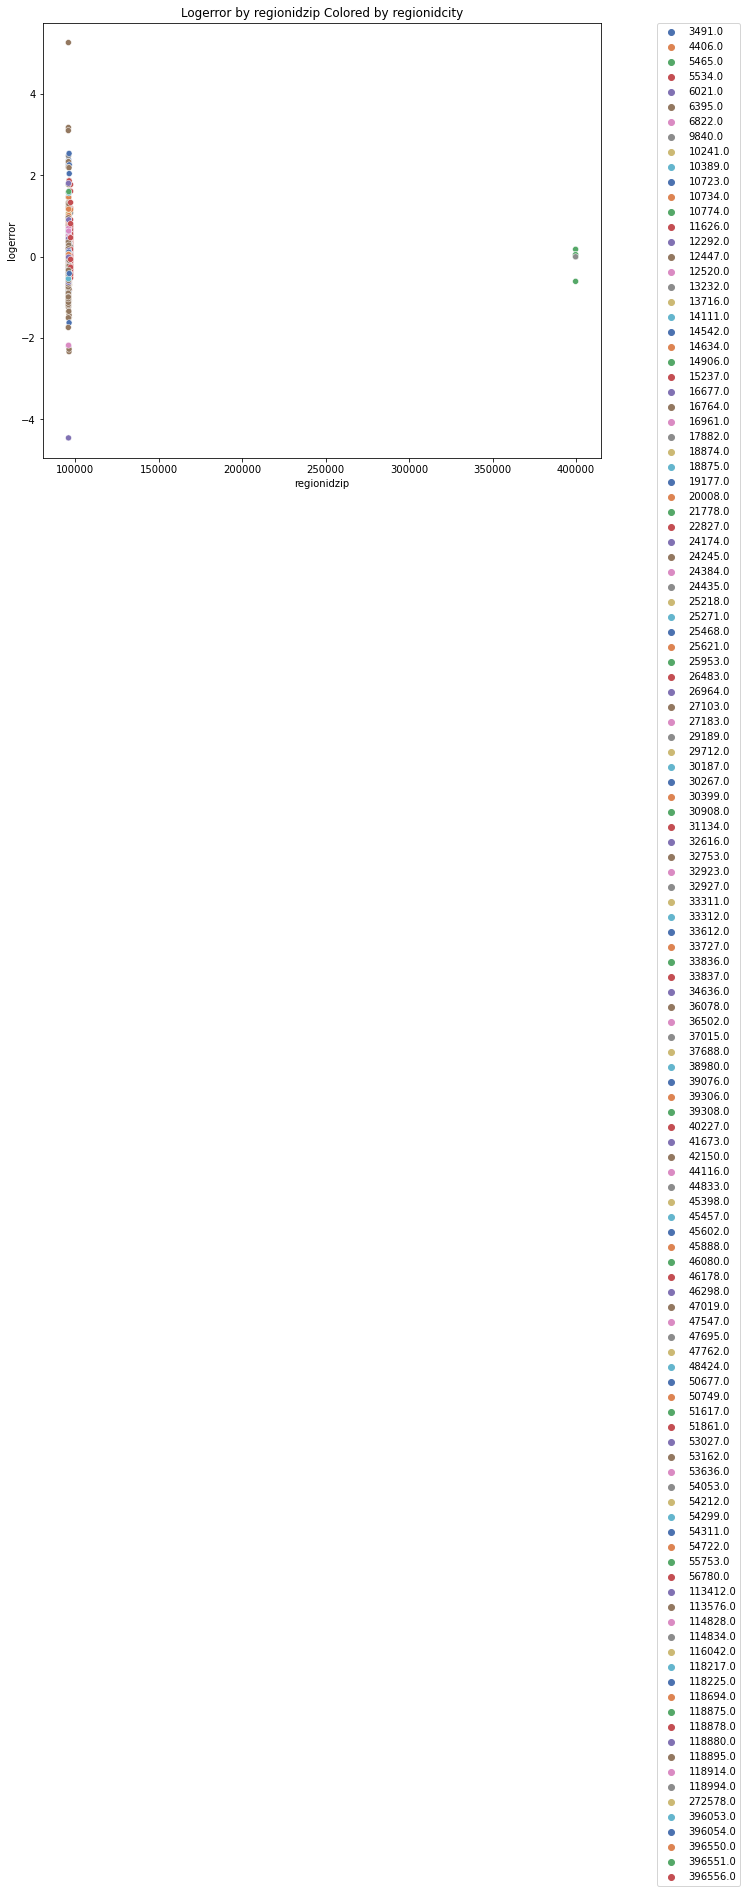

In [7]:
columns = ['yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',  'landtaxvaluedollarcnt', 
           'taxamount', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'regionidzip']

for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='regionidcity', palette='deep')
    plt.title(f"Logerror by {col} Colored by regionidcity")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)


## One Sample Two Tail

- $H0$ The mean logerror of buildingqualitytypeid that are 6+ is the same as the average logerror
- $Ha$ The mean log error of buildingqualitytypeid that are 6+ is not the same as the average logeerror


In [8]:
six_or_better = train.loc[train['buildingqualitytypeid'] >= 6]

t, p = stats.ttest_1samp(six_or_better.logerror, train.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

t = -0.508
p = 0.611
Fail to reject H0


Test for fair (4-6 quality) housing against the whole data set
- $H0$ The mean logerror of buildingqualitytypeid that are fair is the same as the average logerror
- $Ha$ The mean log error of buildingqualitytypeid that are fair is not the same as the average logeerror

In [41]:
fair = train.loc[(train['buildingqualitytypeid'] > 3) & (train['buildingqualitytypeid'] < 7)]

t, p = stats.ttest_1samp(fair.logerror, train.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

t = -0.215
p = 0.830
Fail to reject H0


- $H0$ The mean logerror of buildingqualitytypeid that are between 4 and 8 is the same as the average logerror
- $Ha$ The mean log error of buildingqualitytypeid that are 4 and 8 is not the same as the average logeerror


In [9]:
mid = train.loc[(train['buildingqualitytypeid'] >= 4) & (train['buildingqualitytypeid'] <= 8)]

t, p = stats.ttest_1samp(mid.logerror, train.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

t = -0.542
p = 0.588
Fail to reject H0


## Two Sample Two Tail

- $H0$ The mean logerror of buildingqualitytypeid that are 6+ is the same as the average logerror for less than 6
- $Ha$ The mean log error of buildingqualitytypeid that are 6+ is not the same as the average logeerror less than 6


In [10]:
six_or_higher = train.loc[train['buildingqualitytypeid'] >= 6]
less_than_six = train.loc[train['buildingqualitytypeid'] < 6]



print(six_or_higher.logerror.var())
print(less_than_six.logerror.var())

0.02464138673161434
0.04075658509024947


In [31]:
t, p = stats.ttest_ind(six_or_higher.logerror, less_than_six.logerror, equal_var = False)
a = .05
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < a? ", p/2 < a)
print("is t > 0? ", t > 0)
if p > a:
    print("We fail to reject $H_{0}$")
elif t > 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

T = -0.7789605083749962, p/2= 0.21801181662642483
is p/2 < a?  False
is t > 0?  False
We fail to reject $H_{0}$


In [12]:
mid = train.loc[(train['buildingqualitytypeid'] >= 4) & (train['buildingqualitytypeid'] <= 8)]
rest = train.loc[((train['buildingqualitytypeid'] >= 1) & (train['buildingqualitytypeid'] <= 3)) | (train['buildingqualitytypeid'] > 8)]

print(mid.logerror.var())
print(rest.logerror.var())

0.027446769005878207
0.05757558853748306


In [13]:
t, p = stats.ttest_ind(mid.logerror, rest.logerror, equal_var = False)

a = .05
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < a? ", p/2 < a)
print("is t < 0? ", t < 0)
if p/2 > a:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

T = -1.5270850659058512, p/2= 0.0634882387546539
is p/2 < a?  False
is t < 0?  True
We fail to reject $H_{0}$


## One Sample Two Tail

- $H0$ The mean logerror of house built after 2012 is the same as the average logerror
- $Ha$ The mean logerror of built after 2012 is not the same as the average logeerror

In [14]:
after_2012 = train.loc[train['yearbuilt'] > 2012]

t, p = stats.ttest_1samp(after_2012.logerror, train.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

t = -2.839
p = 0.005
Reject H0


## Chi Squared

- $H0$ There is not a realtionship between calculatedfinishedsquarefeet and logerror
- $Ha$ There is a realtionship between calculatedfinishedsquarefeet and logerror


In [15]:
observed = pd.crosstab(train['calculatedfinishedsquarefeet'], train['logerror'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

72030728.94406638 3.8609926024962497e-10
Reject H0


- $H0$ There is not a realtionship between yearbuilt and logerror
- $Ha$ There is a realtionship between yearbuilt and logerror


In [16]:
observed = pd.crosstab(train['yearbuilt'], train['logerror'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

2536871.8534991136 0.891678654059294
Fail to reject H0


## Pearson's R
- $H0$ There is not a linear realtionship between lotsize and logerror
- $Ha$ There is a linear realtionship between lotsize and logerror


In [36]:
corr, p = stats.pearsonr(train['lotsizesquarefeet'], train['logerror'])

print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

-0.001078156480772953 0.8781009492888909
Fail to reject H0


- $H0$ There is not a linear realtionship between taxvaluedollarcnt and logerror
- $Ha$ There is a linear realtionship between taxvaluedollarcnt and logerror

In [35]:
corr, p = stats.pearsonr(train['taxvaluedollarcnt'], train['logerror'])

print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

-0.029582781198976796 2.5613445341523523e-05
Reject H0


- $H0$ There is not a linear realtionship between calculatedfinishedsquarefeet and logerror
- $Ha$ There is a linear realtionship between calculatedfinishedsquarefeet and logerror


In [34]:
corr, p = stats.pearsonr(train['calculatedfinishedsquarefeet'], train['logerror'])

print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

0.02079931218323176 0.0030843841001890093
Reject H0


# Feature Engereering

* Create a more than 2 bathroom category
* Bin building quality into equal buckets and test for 
* Bin year built into decades to test 

## More Than Two Baths

- $H0$ The mean logerror of homes with more than two baths is the same as the average logerror for homes with 2 or less baths
- $Ha$ The mean logerror of homes with more than two baths is (***Note Sure***) than the average logerror for homes with 2 or less baths

In [20]:
# Create a more than 2 bath feature
train['more_than_two_bath'] = train['bathroomcnt'] > 2

# Set up for the two sample test
two_or_less_bath = train[train.more_than_two_bath == False]
greater_than_two_bath = train[train.more_than_two_bath == True]

#Check variance 
print(two_or_less_bath.logerror.var())
print(greater_than_two_bath.logerror.var())

0.029825557357005757
0.028086989586975444


In [40]:
t, p = stats.ttest_ind(two_or_less_bath.logerror, greater_than_two_bath.logerror)


print(f"T = {t}, p/2= {p/2}")
print("is p/2 < a? ", p/2 < a)
print("is t < 0? ", t > 0)
if p > a:
    print("We fail to reject $H_{0}$")
elif t > 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

T = -3.548389429612432, p/2= 0.00019423604811410626
is p/2 < a?  True
is t < 0?  False
We reject $H_{0}$


# Home Quality Equal Binning 

In [22]:
# Create the intervals for the bins
bins = pd.IntervalIndex.from_tuples([(0, 3), (3, 6), (6, 8), (8, 12)])
# Cut the data into the bins
train['quality_bin'] = pd.cut(train.buildingqualitytypeid, bins)
# Print the data to ensure the intevals worked correctly
train[['buildingqualitytypeid', 'quality_bin']].loc[train['buildingqualitytypeid'] == 4]

,buildingqualitytypeid,quality_bin
25074,4.00,"(3, 6]"
59428,4.00,"(3, 6]"
39758,4.00,"(3, 6]"
45379,4.00,"(3, 6]"
45193,4.00,"(3, 6]"
...,...,...
43923,4.00,"(3, 6]"
44068,4.00,"(3, 6]"
41314,4.00,"(3, 6]"
13349,4.00,"(3, 6]"


### Chi Squared

- $H0$ There is not a realtionship between quality_bin and logerror
- $Ha$ There is a realtionship between quality_bin and logerror


In [23]:
observed = pd.crosstab(train['quality_bin'], train['logerror'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

60498.8658851677 0.4638819661510069
Fail to reject H0


# Year Built Binning by Decade

In [24]:
# Create index interval for decades
bins = pd.IntervalIndex.from_tuples([(1879, 1889), (1889, 1899), (1899, 1909), (1909, 1919), (1919, 1929), (1929, 1939),
                                    (1939, 1949), (1949, 1959), (1959, 1969), (1969, 1979), (1979, 1989), (1989, 1999),
                                    (1999, 2009), (2009, 2019)])

# create the bins based on those decades
train['year_bin'] = pd.cut(train.yearbuilt, bins, include_lowest=True,
                          labels=['1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980',
                                 '1990', '2000', '2010'])

In [25]:
# make sure thta it took the data in correctly corrected
train[['yearbuilt', 'year_bin']].loc[train['yearbuilt']==1950]

,yearbuilt,year_bin
31641,"1,950.00","(1949, 1959]"
32295,"1,950.00","(1949, 1959]"
69135,"1,950.00","(1949, 1959]"
61374,"1,950.00","(1949, 1959]"
9028,"1,950.00","(1949, 1959]"
...,...,...
64953,"1,950.00","(1949, 1959]"
47122,"1,950.00","(1949, 1959]"
64518,"1,950.00","(1949, 1959]"
11845,"1,950.00","(1949, 1959]"


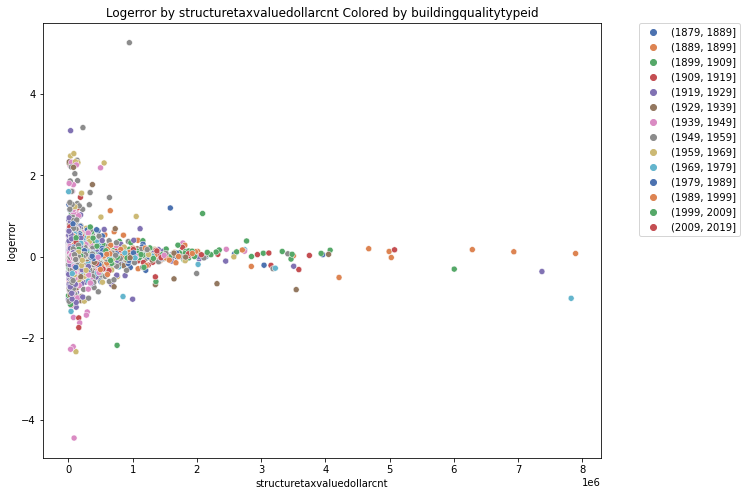

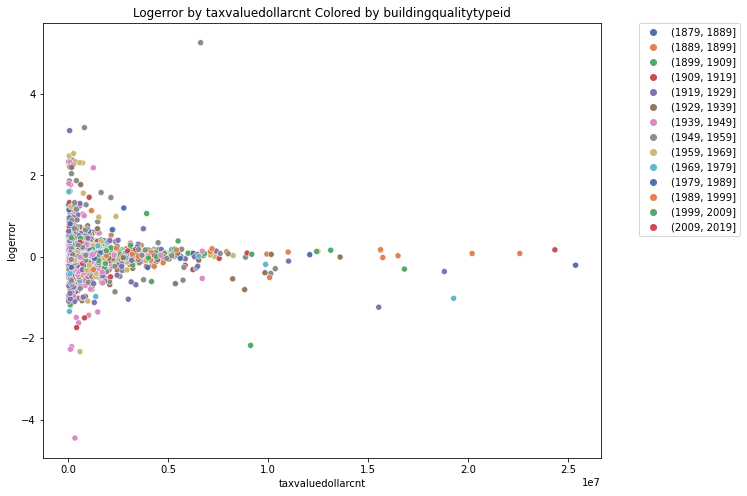

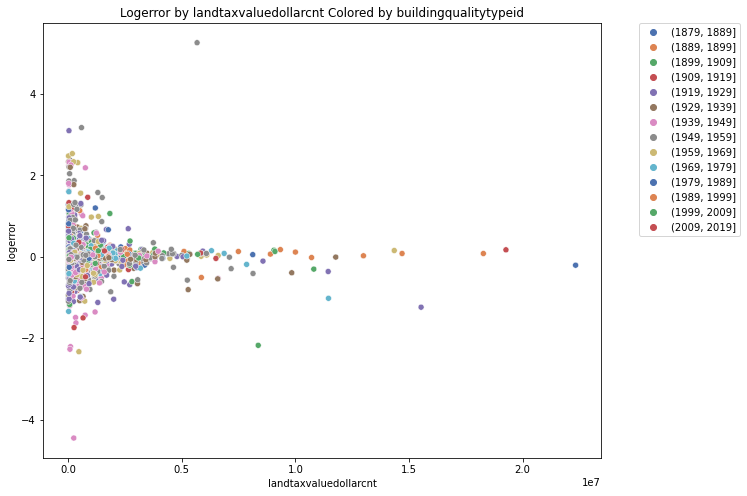

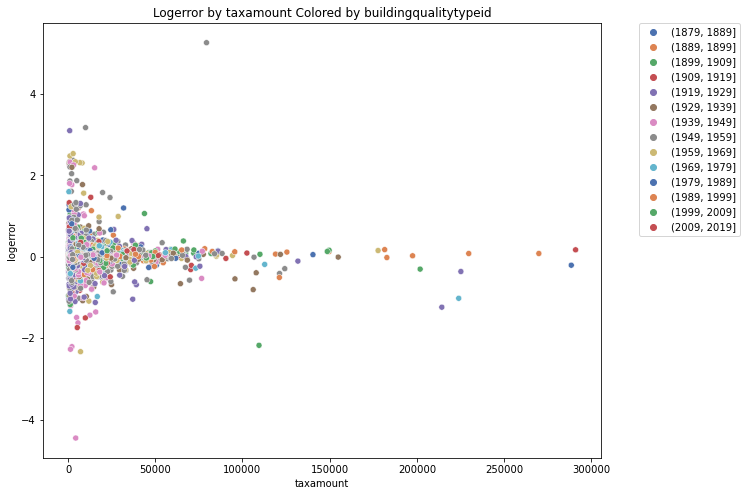

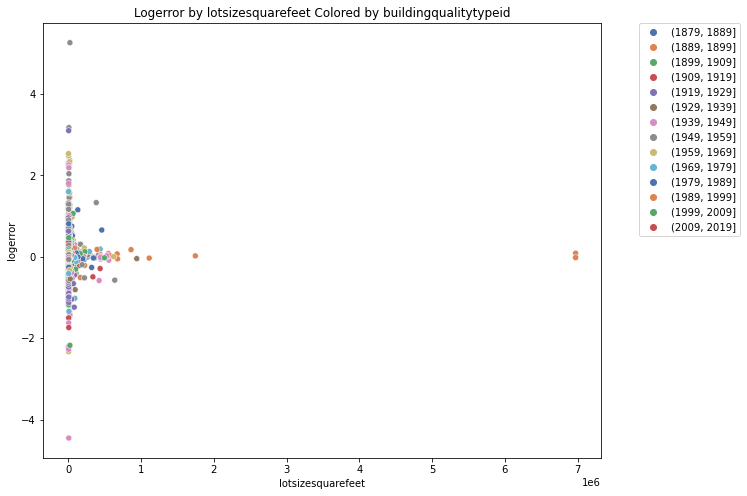

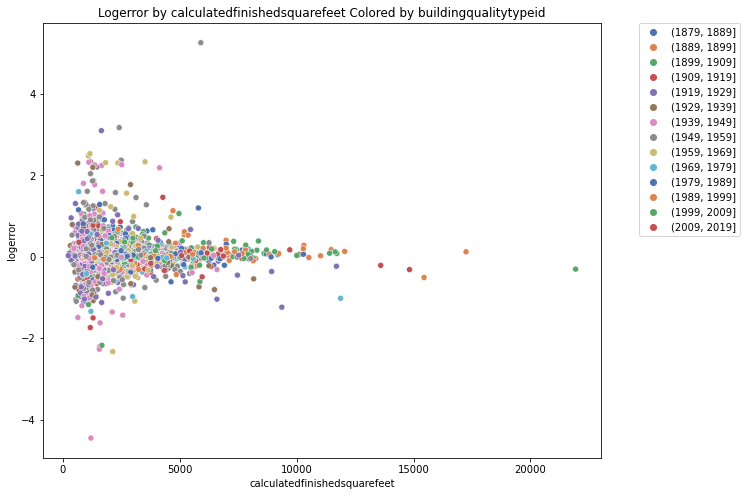

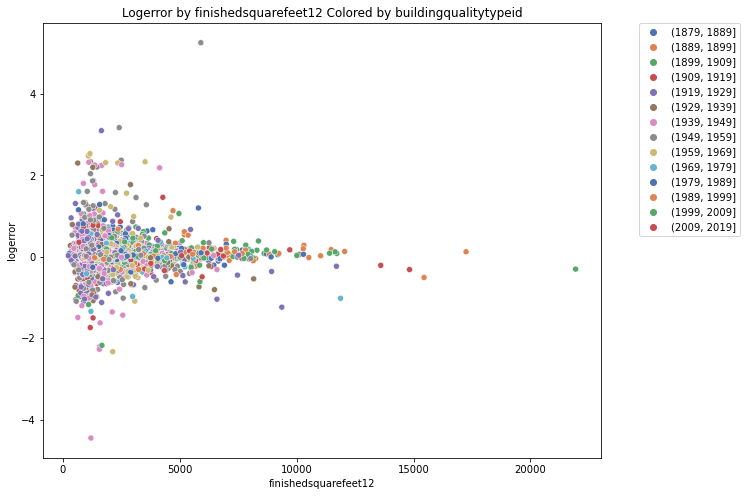

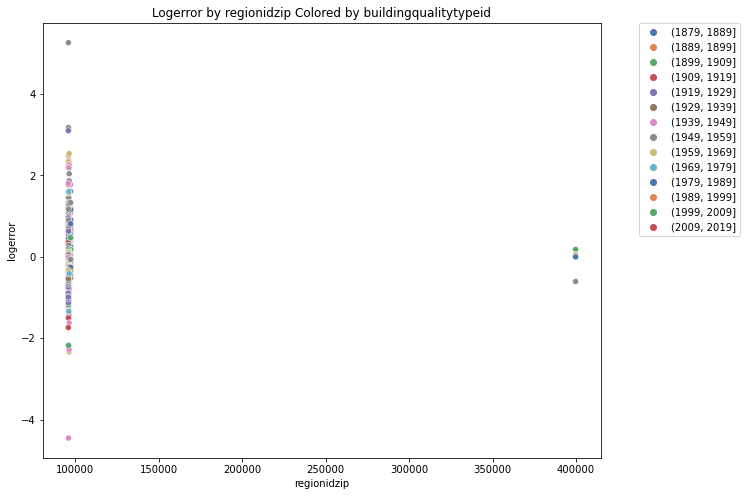

In [26]:
# Use the new year_bin feature as a color code to see if there are any insights in the data

columns = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt',  'landtaxvaluedollarcnt', 
           'taxamount', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'regionidzip']

for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='year_bin', palette='deep')
    plt.title(f"Logerror by {col} Colored by buildingqualitytypeid")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)


## "Successful" Stats tests

- $Ha$ The mean logerror of built after 2012 is not the same as the average logeerror
- $Ha$ The mean logerror of homes with more than two baths is (***Note Sure***) than the average logerror for homes with 2 or less baths
- $Ha$ There is a linear realtionship between taxvaluedollarcnt and logerror
- $Ha$ There is a linear realtionship between calculatedfinishedsquarefeet and logerror
- $Ha$ There is a linear realtionship between calculatedfinishedsquarefeet and logerror

However, I am not seeing any clustering patterns based on the data present.


# Bonus

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [27]:
train['fips'].value_counts()

6,037.00    20238
6,059.00        2
Name: fips, dtype: int64